# Rhizosphere Microbial Diversity Analysis

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from micropyome.datasets import normalize, normalize_categories

DATASET_PATH = "data/legeay/original/"

In [2]:
corr = pd.read_csv(f"{DATASET_PATH}/corr_ITS.csv")
corr_total = pd.read_csv(f"{DATASET_PATH}/corr_total_16S.csv")

In [3]:
corr

,NGS,Sample,Environnement,Lieu,Culture,Phenotype,Irrig,Lat,Long,Poids,Precipitation,Hygro,TotalN,TotalP,TotalK,TotalC
0,97,1,Rhizosphere,1,A,R,Yes,32.496,-6.2232,2,357,1,0.16,0.56,0.40,1.49
1,98,2,Rhizosphere,1,A,R,Yes,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49
2,99,3,Rhizosphere,1,A,R,Yes,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49
3,100,4,Rhizosphere,1,A,R,Yes,32.496,-6.2232,2,357,1,0.16,0.56,0.40,1.49
4,101,5,Rhizosphere,1,A,R,Yes,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,S167,113,Bulk soil,9,NaN,NaN,No,33.285,-7.6120,0,343,1,0.16,0.31,0.40,2.14
172,S169,115,Bulk soil,11,NaN,NaN,No,32.140,-7.0270,0,356,1,0.20,0.20,0.21,3.81
173,S170,116,Bulk soil,12,NaN,NaN,No,32.150,-7.9070,0,291,1,0.18,0.09,0.48,1.70
174,S171,117,Bulk soil,7,NaN,NaN,No,33.476,-7.6610,0,343,1,0.18,0.09,0.16,1.77


In [4]:
corr_total

,Sample,NGS,Environnement,Lieu,Culture,Phenotype,Agricultural_usage,Lat,Long,Poids,Precipitation,Hygro,TotalN,TotalP,TotalK,TotalC
0,1,Sample19,Rhizosphere,1,A,R,Yes,32.496,-6.2232,3.20,357,Dry,0.16,0.56,0.40,1.49
1,2,Sample20,Rhizosphere,1,A,R,Yes,32.496,-6.2232,1.88,357,Dry,0.16,0.56,0.40,1.49
2,3,Sample21,Rhizosphere,1,A,R,Yes,32.496,-6.2232,1.88,357,Dry,0.16,0.56,0.40,1.49
3,4,Sample22,Rhizosphere,1,A,R,Yes,32.496,-6.2232,3.60,357,Dry,0.16,0.56,0.40,1.49
4,5,Sample23,Rhizosphere,1,A,R,Yes,32.496,-6.2232,2.04,357,Dry,0.16,0.56,0.40,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,116,Sample14,Bulk_soil,12,NaN,NaN,No,32.150,-7.9070,0.00,291,Dry,0.18,0.09,0.48,1.70
176,117,Sample15,Bulk_soil,7,NaN,NaN,No,33.476,-7.6610,0.00,343,Dry,0.18,0.09,0.16,1.77
177,119,Sample16,Bulk_soil,6,NaN,NaN,Yes,33.488,-6.6110,0.00,528,Humid,0.17,0.07,0.57,1.66
178,120,Sample17,Bulk_soil,13,NaN,NaN,No,32.692,-6.3380,0.00,356,Dry,0.06,0.12,0.26,2.05


In [22]:
ex= corr.copy()
ex.loc[0, "Environnement"] = 1

In [25]:
def categorize_scalars(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for column in df.columns:
        if type(df[column][0]) == str:
            labels = list(set(df[column]))
            categories = {}
            for i, label in enumerate(labels):
                categories[label] = i
            for i, row in enumerate(df[column]):
                df.loc[i, column] = categories[row]
    return df

ex = corr.copy()
ex = categorize_scalars(ex)

In [26]:
ex

,NGS,Sample,Environnement,Lieu,Culture,Phenotype,Irrig,Lat,Long,Poids,Precipitation,Hygro,TotalN,TotalP,TotalK,TotalC
0,22,1,2,1,7,1,1,32.496,-6.2232,2,357,1,0.16,0.56,0.40,1.49
1,56,2,2,1,7,1,1,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49
2,76,3,2,1,7,1,1,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49
3,19,4,2,1,7,1,1,32.496,-6.2232,2,357,1,0.16,0.56,0.40,1.49
4,12,5,2,1,7,1,1,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,121,113,1,9,1,0,0,33.285,-7.6120,0,343,1,0.16,0.31,0.40,2.14
172,83,115,1,11,1,0,0,32.140,-7.0270,0,356,1,0.20,0.20,0.21,3.81
173,100,116,1,12,1,0,0,32.150,-7.9070,0,291,1,0.18,0.09,0.48,1.70
174,117,117,1,7,1,0,0,33.476,-7.6610,0,343,1,0.18,0.09,0.16,1.77


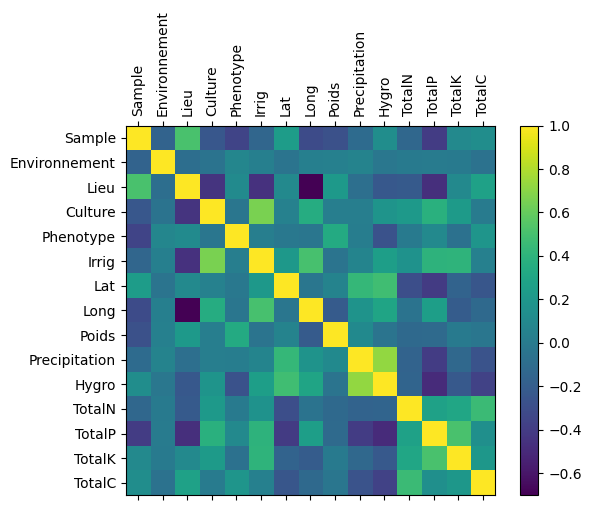

In [27]:
view = ex.copy()
view = view.drop(view.columns[0], axis=1)

fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(view.corr())
fig.colorbar(cax)
labels = view.columns.values
ax.set_yticks(list(range(len(labels))), labels)
ax.set_xticks(list(range(len(labels))), labels, rotation=90)
plt.show()

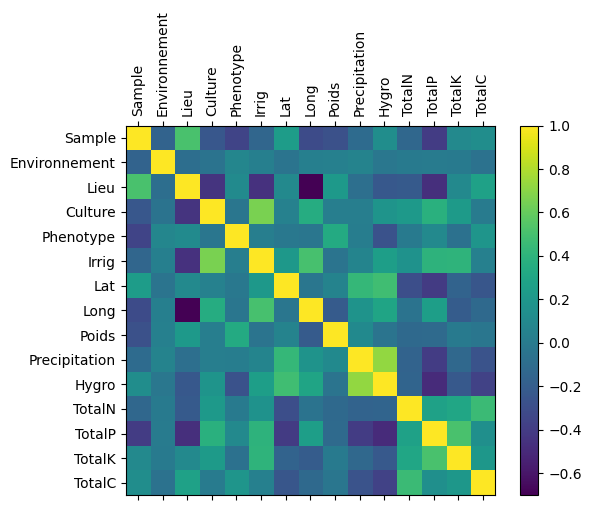

In [29]:
view = ex.copy()
view = normalize(view)
view = view.drop(view.columns[0], axis=1)

fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(view.corr())
fig.colorbar(cax)
labels = view.columns.values
ax.set_yticks(list(range(len(labels))), labels)
ax.set_xticks(list(range(len(labels))), labels, rotation=90)
plt.show()

# Variables to remove
- Sample
- Lieu
- lat
- long

# à clarifier
- catégorie de culture : Table S1, Crop
- Hygro

In [30]:
view

,Sample,Environnement,Lieu,Culture,Phenotype,Irrig,Lat,Long,Poids,Precipitation,Hygro,TotalN,TotalP,TotalK,TotalC
0,0.0,1.0,0.0,0.875,0.5,1.0,0.21787,0.999525,0.666667,0.674286,0.0,0.238095,0.87931,0.402299,0.25641
1,0.008475,1.0,0.0,0.875,0.5,1.0,0.21787,0.999525,0.333333,0.674286,0.0,0.238095,0.87931,0.402299,0.25641
2,0.016949,1.0,0.0,0.875,0.5,1.0,0.21787,0.999525,0.333333,0.674286,0.0,0.238095,0.87931,0.402299,0.25641
3,0.025424,1.0,0.0,0.875,0.5,1.0,0.21787,0.999525,0.666667,0.674286,0.0,0.238095,0.87931,0.402299,0.25641
4,0.033898,1.0,0.0,0.875,0.5,1.0,0.21787,0.999525,0.333333,0.674286,0.0,0.238095,0.87931,0.402299,0.25641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.949153,0.5,0.666667,0.125,0.0,0.0,0.700734,0.175116,0.0,0.647619,0.0,0.238095,0.448276,0.402299,0.464744
172,0.966102,0.5,0.833333,0.125,0.0,0.0,0.0,0.522379,0.0,0.672381,0.0,0.333333,0.258621,0.183908,1.0
173,0.974576,0.5,0.916667,0.125,0.0,0.0,0.00612,0.0,0.0,0.548571,0.0,0.285714,0.068966,0.494253,0.323718
174,0.983051,0.5,0.5,0.125,0.0,0.0,0.817625,0.146029,0.0,0.647619,0.0,0.285714,0.068966,0.126437,0.346154


In [51]:
def to_onehot(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for column in df.columns:
        if type(df[column][0]) == str:
            labels = list(set(df[column]))
            if len(labels) > 10:
                df = df.drop(columns=column, errors="ignore")
    df = pd.get_dummies(df)
    df.replace({False: 0, True: 1}, inplace=True)
    return df

pd.set_option('display.max_columns', None)
corr_onehot = to_onehot(corr)
corr_onehot = corr_onehot.drop(columns="Sample")
corr_onehot



C:\Users\vince\AppData\Local\Temp\ipykernel_13148\3819319840.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


,Lieu,Lat,Long,Poids,Precipitation,Hygro,TotalN,TotalP,TotalK,TotalC,Environnement_Bulk soil,Environnement_Rhizosphere,Environnement_Roots,Culture_A,Culture_B,Culture_C,Culture_D,Culture_E,Culture_F,Culture_G,Culture_H,Phenotype_E,Phenotype_R,Irrig_No,Irrig_Yes
0,1,32.496,-6.2232,2,357,1,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
1,1,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
2,1,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
3,1,32.496,-6.2232,2,357,1,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
4,1,32.496,-6.2232,1,357,1,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,9,33.285,-7.6120,0,343,1,0.16,0.31,0.40,2.14,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
172,11,32.140,-7.0270,0,356,1,0.20,0.20,0.21,3.81,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
173,12,32.150,-7.9070,0,291,1,0.18,0.09,0.48,1.70,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
174,7,33.476,-7.6610,0,343,1,0.18,0.09,0.16,1.77,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


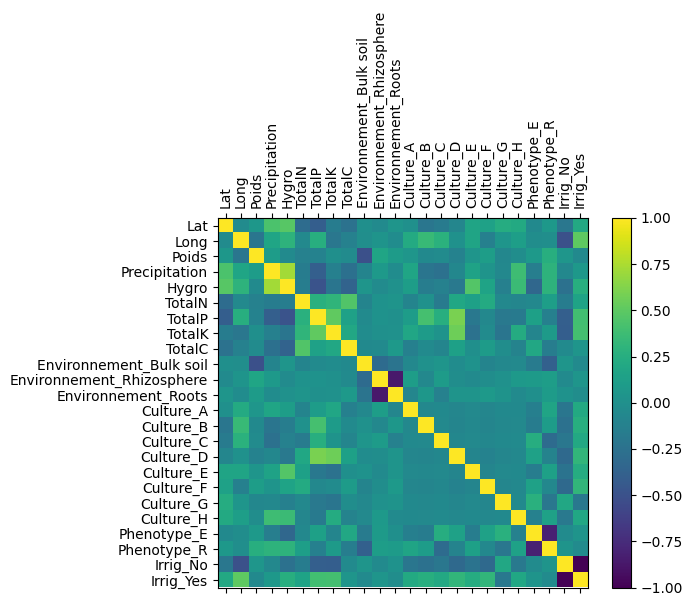

In [52]:
view = corr_onehot.copy()
view = view.drop(view.columns[0], axis=1)

fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(view.corr())
fig.colorbar(cax)
labels = view.columns.values
ax.set_yticks(list(range(len(labels))), labels)
ax.set_xticks(list(range(len(labels))), labels, rotation=90)
plt.show()

In [50]:
corr_total_onehot = to_onehot(corr_total)
corr_total_onehot

C:\Users\vince\AppData\Local\Temp\ipykernel_13148\3660296586.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


,Lieu,Lat,Long,Poids,Precipitation,TotalN,TotalP,TotalK,TotalC,Environnement_Bulk_soil,Environnement_Rhizosphere,Environnement_Roots,Culture_A,Culture_B,Culture_C,Culture_D,Culture_E,Culture_F,Culture_G,Culture_H,Phenotype_E,Phenotype_R,Agricultural_usage_No,Agricultural_usage_Yes,Hygro_Dry,Hygro_Humid
0,1,32.496,-6.2232,3.20,357,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
1,1,32.496,-6.2232,1.88,357,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
2,1,32.496,-6.2232,1.88,357,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
3,1,32.496,-6.2232,3.60,357,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
4,1,32.496,-6.2232,2.04,357,0.16,0.56,0.40,1.49,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,12,32.150,-7.9070,0.00,291,0.18,0.09,0.48,1.70,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
176,7,33.476,-7.6610,0.00,343,0.18,0.09,0.16,1.77,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
177,6,33.488,-6.6110,0.00,528,0.17,0.07,0.57,1.66,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
178,13,32.692,-6.3380,0.00,356,0.06,0.12,0.26,2.05,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


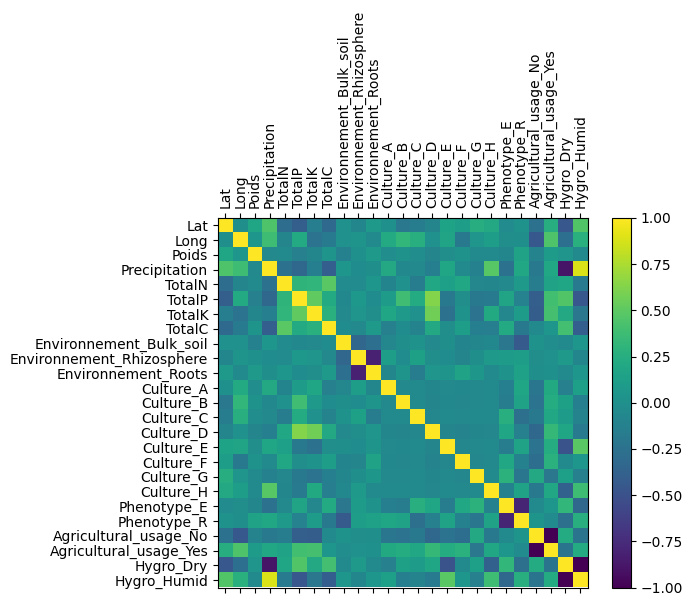

In [53]:
view = corr_total_onehot.copy()
view = view.drop(view.columns[0], axis=1)

fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(view.corr())
fig.colorbar(cax)
labels = view.columns.values
ax.set_yticks(list(range(len(labels))), labels)
ax.set_xticks(list(range(len(labels))), labels, rotation=90)
plt.show()

## Transfer Learning